Chapter 21
# 利用极坐标产生等高线坐标
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex, simplify
from sympy import symbols
# 导入符号变量

from matplotlib import cm
# 导入色谱模块

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [3]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-1.2,1.2,num)
    y_array = np.linspace(-1.2,1.2,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 1. 定义二次型
参考：  
https://mathworld.wolfram.com/QuadraticForm.html

In [4]:
x1, x2 = symbols('x1 x2')
# 自定义函数计算二次型函数值
def quadratic(Q, xx1, xx2):
    
    x = np.array([[x1],
                  [x2]])
    
    # 二次型，符号
    f_x1x2 = x.T @ Q @ x

    f_x1x2_fcn = lambdify([x1,x2],f_x1x2[0][0])
    # 将符号函数表达式转换为Python函数
    
    ff = f_x1x2_fcn(xx1, xx2)
    # 计算二元函数函数值
    
    return ff,simplify(f_x1x2[0][0])


### 2. 自定义可视化函数

In [5]:
def visualize(Q, title):
    
    xx1, xx2 = mesh(num = 201)
    ff,f_x1x2 = quadratic(Q, xx1, xx2)
    
    ### 单位圆坐标
    theta_array = np.linspace(0, 2*np.pi, 100)
    x1_circle = np.cos(theta_array)
    x2_circle = np.sin(theta_array)

    fig = plt.figure(figsize=(8,4))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.contourf(xx1, xx2, ff, 15, cmap='RdYlBu_r')
    ax.plot(x1_circle, x2_circle, color = 'k')
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_wireframe(xx1, xx2, ff,
                      color = [0.5,0.5,0.5],
                      rstride=10, cstride=10,
                      linewidth = 0.25)

    ax.contour(xx1, xx2, ff,cmap = 'RdYlBu_r', levels = 15)
    f_circle, _ = quadratic(Q, x1_circle, x2_circle)
    ax.plot(x1_circle, x2_circle, f_circle, color = 'k')

    ax.set_proj_type('ortho')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$f(x_1,x_2)$')

    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_zticks([])
    ax.view_init(azim=-120, elev=30)
    # ax.view_init(azim=-135, elev=60)
    plt.tight_layout()
    ax.grid(False)
    
    fig.savefig('Figures/' + title + '.svg', format='svg')
    
    return f_x1x2

### 3. 开口朝上正椭圆面

4*x1**2 + x2**2

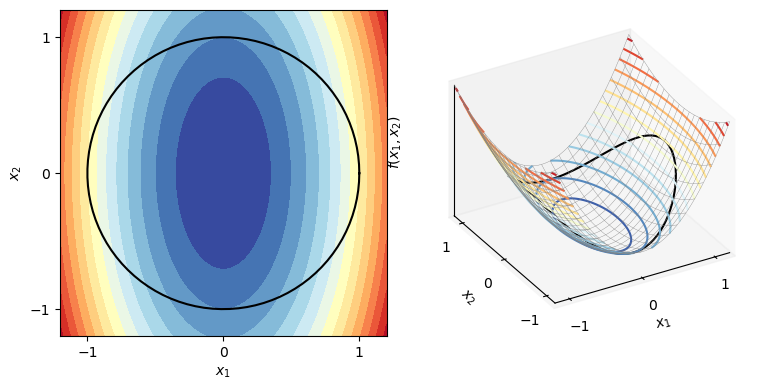

In [6]:
Q = np.array([[4,0],
              [0,1]])

f_x1x2 = visualize(Q, '开口朝上正椭圆面')
f_x1x2

### 4. 开口朝上旋转椭圆面

2*x1**2 - 2*x1*x2 + 2*x2**2

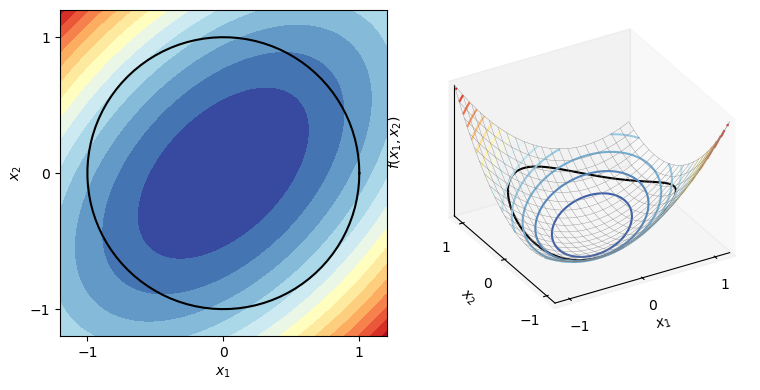

In [7]:
Q = np.array([[2,-1],
              [-1,2]])

f_x1x2 = visualize(Q, '开口朝上旋转椭圆面')
f_x1x2

### 5. 开口朝下正椭圆面

-4*x1**2 - x2**2

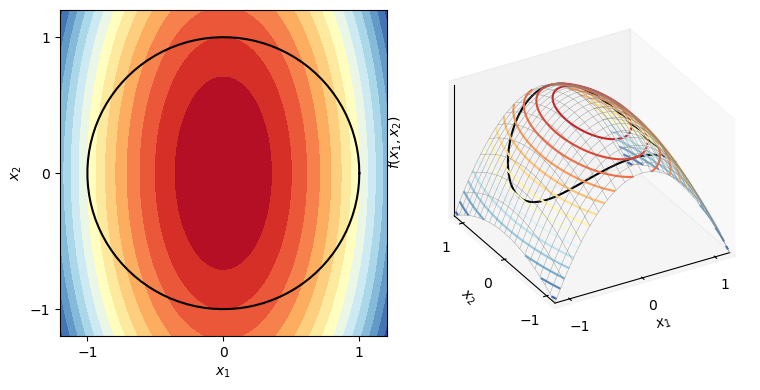

In [8]:
Q = np.array([[-4,0],
              [0,-1]])

f_x1x2 = visualize(Q, '开口朝下正椭圆面')
f_x1x2

### 6. 开口朝下旋转椭圆面

-2*x1**2 - 2*x1*x2 - 2*x2**2

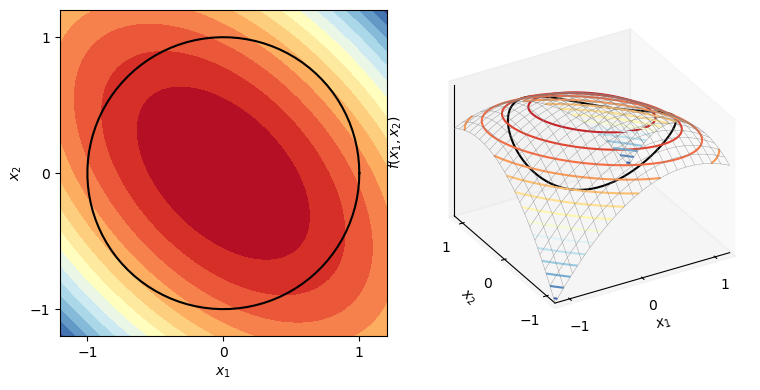

In [9]:
Q = np.array([[-2,-1],
              [-1,-2]])

f_x1x2 = visualize(Q, '开口朝下旋转椭圆面')
f_x1x2

### 7. 旋转山谷

(x1 - x2)**2

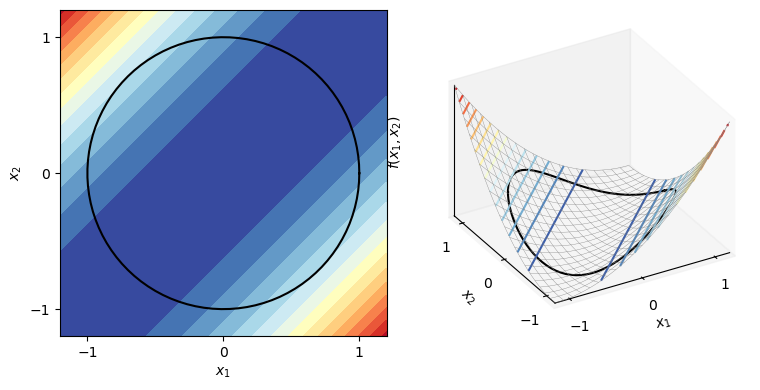

In [10]:
Q = np.array([[1,-1],
              [-1,1]])

f_x1x2 = visualize(Q, '旋转山谷')
f_x1x2

### 8. 旋转山脊

-(x1 - x2)**2

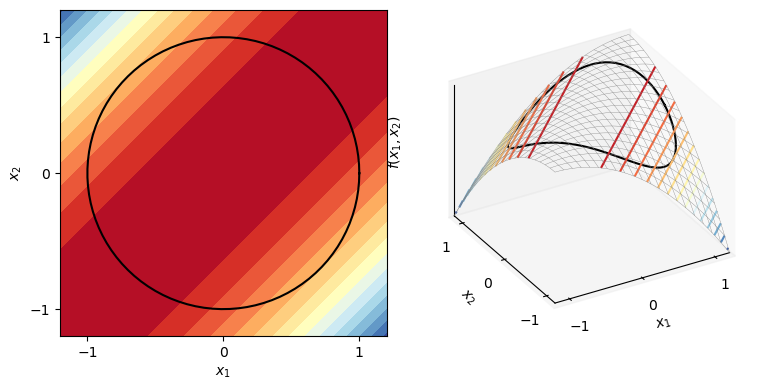

In [11]:
Q = np.array([[-1,1],
              [1,-1]])

f_x1x2 = visualize(Q, '旋转山脊')
f_x1x2

### 9. 双曲面

x1**2 - x2**2

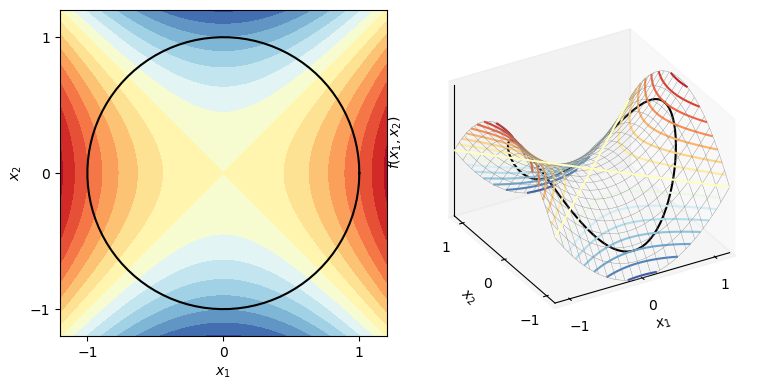

In [12]:
Q = np.array([[1,0],
                [0,-1]])


f_x1x2 = visualize(Q, '双曲面')
f_x1x2

### 10. 旋转双曲面

2*x1*x2

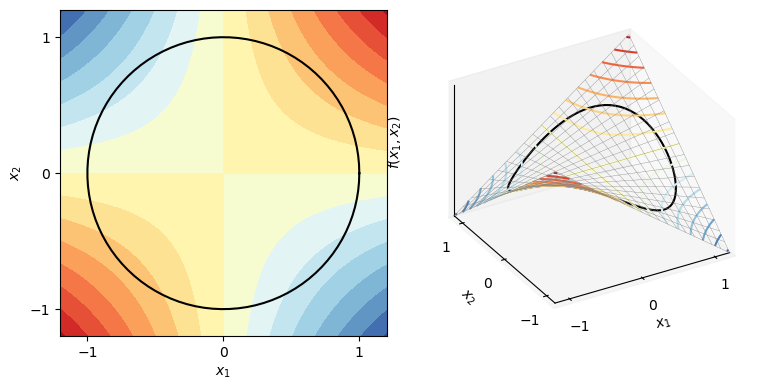

In [13]:
Q = np.array([[0,1],
              [1,0]])

f_x1x2 = visualize(Q, '旋转双曲面')
f_x1x2

In [14]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023